# Alignment Code

Contains test code as I'm developing tools for image registration.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

from dipy.viz import regtools
from skimage import data
from skimage.feature import register_translation
from scipy.ndimage import fourier_shift
import matplotlib.pyplot as plt
import numpy as np

from janelia_core.fileio.ahrens_lab import read_exp
from janelia_core.fileio.exp_reader import read_img_file
from janelia_core.registration.registration import get_valid_translated_image_window
from janelia_core.registration.registration import calc_phase_corr_shift
from janelia_core.registration.registration import apply_translation

## Load example image

In [3]:
image = data.camera()
raw_image_shape = image.shape

#### List the base window and true shifts we will apply to create set of shifted images

In [4]:
base_window_inds = (slice(100,300,1), slice(100, 300, 1))
shifts = np.asarray([[-3, -3], [15, 15], [-10, -20]])

## Create shifted example images

In [5]:
n_shifted_images = shifts.shape[0]
shifted_images = [None]*n_shifted_images
for i in range(n_shifted_images):
    cur_shift = shifts[i,:]
    shifted_image = np.real(np.fft.ifftn(fourier_shift(np.fft.fftn(image), cur_shift)))
    shifted_images[i] = shifted_image[base_window_inds[0], base_window_inds[1]]

## Look at pair of translated images

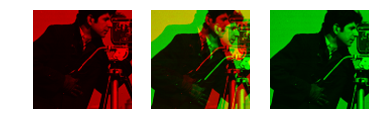

In [6]:
r = regtools.overlay_images(shifted_images[0], shifted_images[1])

## Calculate shifts

In [7]:
est_shifts = [calc_phase_corr_shift(shifted_images[0], img) for img in shifted_images[1:]]

## Apply shifts

In [8]:
reg_images = [apply_translation(shifted_images[i], est_shifts[i-1]) for i in range(1,n_shifted_images)]

## Look at registered pair of images before constraining window to valid window region

In [19]:
cmp_img = 1

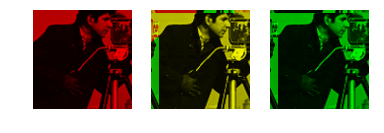

In [20]:
r = regtools.overlay_images(shifted_images[0], reg_images[cmp_img])

## Get valid window after shifts are applied

In [21]:
valid_window = get_valid_translated_image_window(np.asarray(est_shifts), shifted_images[0].shape)

## Look at registered pair of images in valid window

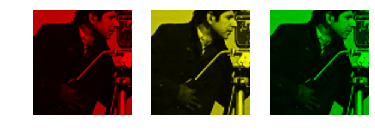

In [22]:
r = regtools.overlay_images(shifted_images[0][valid_window], reg_images[cmp_img][valid_window])